In [14]:
%matplotlib inline
import networkx as nx
import math
import random
from scipy import optimize
import warnings
warnings.simplefilter("ignore")

# 平面的グラフと平面グラフ

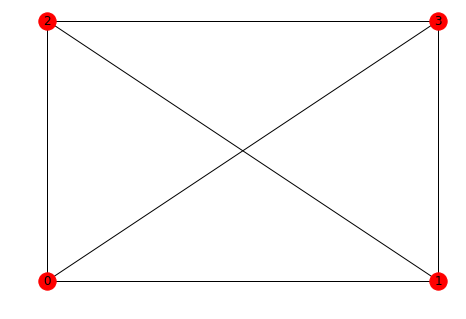

In [15]:
K4 = nx.complete_graph(4)
mypos1 = {0: (0, 0), 1: (10, 0),  2: (0, 10), 3: (10, 10)}
nx.draw(K4, pos = mypos1, with_labels = True)

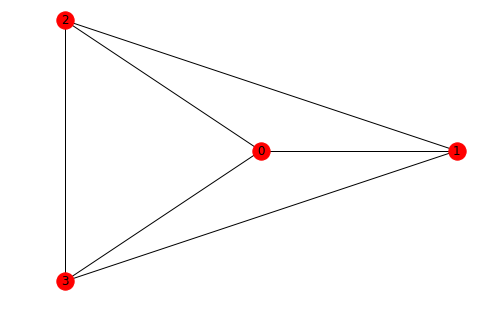

In [16]:
mypos2 = {0: (0, 0), 1: (10, 0),  2: (-10, 10), 3: (-10, -10)}
nx.draw(K4, pos = mypos2, with_labels = True)

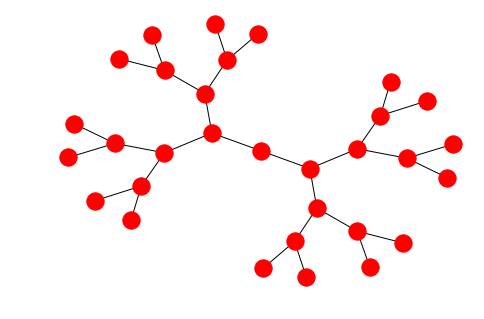

In [17]:
T1 = nx.balanced_tree(2, 4)
nx.draw_kamada_kawai(T1)

In [18]:
nx.check_planarity(K4)

(True, <networkx.algorithms.planarity.PlanarEmbedding at 0xef6bad0>)

# オイラーの公式

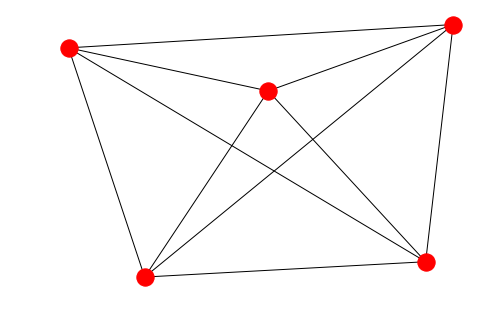

In [19]:
K5 = nx.complete_graph(5)
nx.draw(K5)

In [20]:
(K5.number_of_nodes() >= 3) & (K5.number_of_edges() <= 3*K5.number_of_nodes() - 6)

False

In [26]:
nx.check_planarity(K5)

(False, None)

# 正多面体の分類

In [21]:
def barycentric_coordinates(graph, fixed_nodes, n_iter):
    if len(fixed_nodes) < 3:
        print("The number of fixed nodes must be more than two.")
        return
    else:
        layout = {}
        cnt = 0
        for v in fixed_nodes:
            layout[v] = [100*math.cos(cnt*2*math.pi/len(fixed_nodes)), 100*math.sin(cnt*2*math.pi/len(fixed_nodes))]
            cnt = cnt+1
        for v in graph.nodes:
            if not (v in fixed_nodes):
                layout[v] = [random.random(), random.random()]
        for i in range(n_iter):
            new_layout = {}
            for v in graph.nodes:
                new_layout[v] = [0, 0]
                if v in fixed_nodes:
                    new_layout[v] = layout[v]
                else:
                    for u in nx.all_neighbors(graph, v):
                        new_layout[v][0] += layout[u][0]/nx.degree(graph, v)
                        new_layout[v][1] += layout[u][1]/nx.degree(graph, v)
            layout = new_layout
        return layout

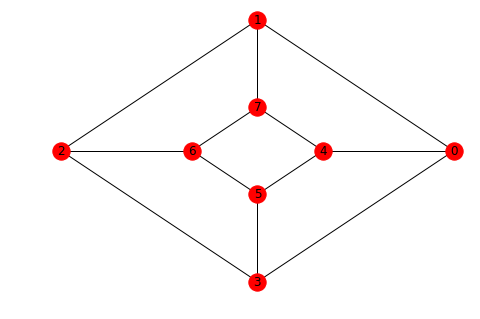

In [22]:
G1 = nx.cubical_graph()
nx.draw(G1, with_labels = True, pos = barycentric_coordinates(G1, [0,1,2,3], 100))

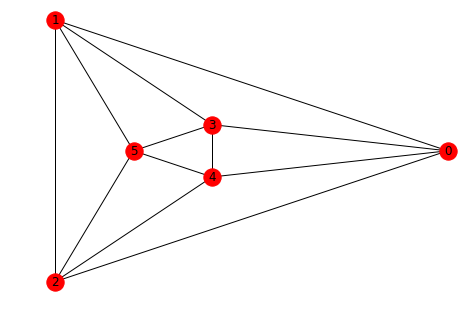

In [23]:
G2 = nx.octahedral_graph()
nx.draw(G2, with_labels = True, pos = barycentric_coordinates(G2, [0,1,2], 100))

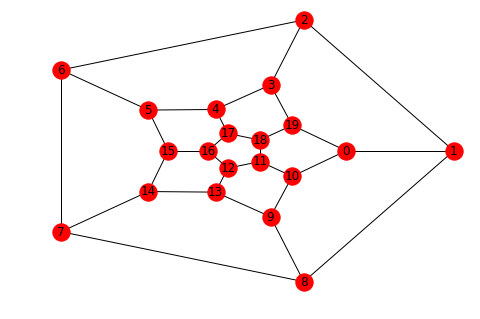

In [24]:
G3 = nx.dodecahedral_graph()
nx.draw(G3, with_labels = True, pos = barycentric_coordinates(G3, [1,2,6,7,8], 100))

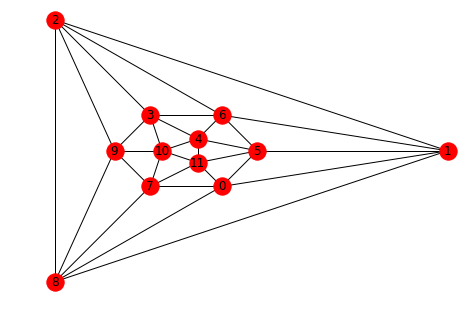

In [25]:
G4 = nx.icosahedral_graph()
nx.draw(G4, with_labels = True, pos = barycentric_coordinates(G4, [1,2,8], 100))